In [1]:
import lib_analysis
import gin
import lib_biased_mnist

%load_ext autoreload
%autoreload 2

In [2]:
gin.enter_interactive_mode()

Extracting /home/ericpts/.datasets/mnist/raw/train-images-idx3-ubyte.gz to /home/ericpts/.datasets/mnist/raw


Extracting /home/ericpts/.datasets/mnist/raw/train-labels-idx1-ubyte.gz to /home/ericpts/.datasets/mnist/raw


Extracting /home/ericpts/.datasets/mnist/raw/t10k-images-idx3-ubyte.gz to /home/ericpts/.datasets/mnist/raw




Extracting /home/ericpts/.datasets/mnist/raw/t10k-labels-idx1-ubyte.gz to /home/ericpts/.datasets/mnist/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


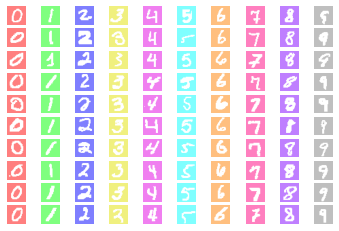

In [5]:
gin.bind_parameter('BiasedMnistProblem.filter_for_digits', list(range(10)))
gin.bind_parameter('BiasedMnistProblem.training_data_label_correlation', 1)
gin.bind_parameter('BiasedMnistProblem.background_noise_level', 0) 

D_train = lib_biased_mnist.BiasedMnistProblem().generate_training_data()
X, y = next(D_train.batch(10_000).as_numpy_iterator())
lib_analysis.plot_digit_grid(X, y)

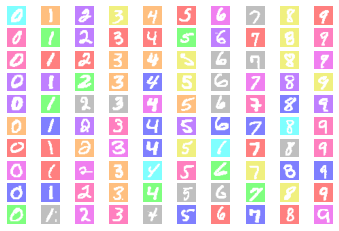

In [4]:
D_test = lib_biased_mnist.BiasedMnistProblem().generate_testing_data()
X, y = next(D_test.batch(10_000).as_numpy_iterator())
lib_analysis.plot_digit_grid(X, y)